In [1]:
# Reference: https://jupyterbook.org/interactive/hiding.html
# Use {hide, remove}-{input, output, cell} tags to hiding content

import sys
import os
if not any(path.endswith('textbook') for path in sys.path):
    sys.path.append(os.path.abspath('../../..'))
from textbook_utils import *

In [2]:
times = pd.read_csv('data/seattle_bus_times_NC.csv')

def mae_loss(theta, y_vals):
    return np.mean(np.abs(y_vals - theta))

def try_thetas(thetas, y_vals, xlims, loss_fn=mae_loss, figsize=(5, 3),
               rug_height=0.1, cols=3):
    if not isinstance(y_vals, np.ndarray):
        y_vals = np.array(y_vals)
    rows = int(np.ceil(len(thetas) / cols))
    plt.figure(figsize=figsize)
    for i, theta in enumerate(thetas):
        ax = plt.subplot(rows, cols, i + 1)
        sns.rugplot(y_vals, height=rug_height, ax=ax)
        plt.axvline(theta, linestyle='--',
                    label=rf'$ \theta = {theta} $')
        plt.title(f'Avg Loss = {loss_fn(theta, y_vals):.2f}')
        plt.xlim(*xlims)
        plt.yticks([])
        plt.legend()
    plt.tight_layout()

# Minimizing Loss

We want to model how late the northbound C bus is by a constant, which we call
$\theta$, and we want to use the data of actual minutes each bus is late to figure
out a good value for $\theta$.
To do this, we use a *loss function*---a function that measures
how far away our constant, $ \theta $, is from the actual data.

A loss function is a mathematical function that takes in $\theta$ and a
data value $y$. It outputs a single number, the *loss*, that
measures how far away $\theta$ is from $y$. We write the loss function
as ${\cal l}(\theta, y)$.

By convention, the loss function outputs lower values for better values of
$\theta$ and larger values for worse $\theta$. To fit a constant to our data, we
select the particular $\theta$ that produces the lowest average loss across all
choices for $ \theta $. In other words, we find the $\theta$ that *minimizes the average
loss* for our data, $y_1, \ldots, y_n$. More formally, we write the average loss as $L(\theta, y_1, y_2, \ldots, y_n)$, where:

$$
\begin{aligned}
L(\theta, y_1, y_2, \ldots, y_n)
&= \text{mean}\left\{ {\cal l}(\theta, y_1),
      {\cal l}(\theta, y_2), \ldots,
      {\cal l}(\theta, y_n) \right\} \\
&= \frac{1}{n} \sum_{i = 1}^{n} {\cal l}(\theta, y_i)\\
\end{aligned}
$$


As a shorthand, we often use the vector $ \mathbf{y} = [ y_1, y_2, \ldots, y_n ] $.
Then we can write the average loss as:

$$
L(\theta, \mathbf{y})
= \frac{1}{n} \sum_{i = 1}^{n}{\cal l}(\theta, {y_i})\\
$$


:::{note}

Notice that ${\cal l}(\theta, y)$ tells us the model's loss for a single data
point while $ L(\theta, \mathbf{y}) $ gives the model's average
loss for all the data points. The capital $L$ helps us remember that the
average loss combines multiple smaller $\cal l$ values.

:::

Once we define a loss function, we can find the value of $\theta$ that produces
the smallest average loss. We call this minimizing value $\hat{\theta}$. In other words, of all the possible $\theta$ values,
$\hat{\theta}$ is the one that produces the smallest average loss for our data.
We call this optimization process *model fitting*; it finds the best constant model for our data.

Next, we look at two particular loss functions: absolute error and squared
error. Our goal is to fit the model and find $\hat{\theta}$ for each of these
loss functions.

## Mean Absolute Error

We start with the *absolute error* loss function. Here's the idea behind
absolute loss. For some value of $\theta$ and data value $y$:

1. Find the error, $y - \theta$.
1. Take the absolute value of the error, $|y - \theta|$. 

So the loss function is ${\cal l}(\theta, y) = | y - \theta |$.

Taking the absolute value of the error is a simple way to convert negative
errors into positive ones. For instance, the point,
$y=4$, is equally far away from $\theta = 2$ and $\theta = 6$, so the errors are equally "bad."

The average of the absolute errors is called the _mean absolute error_ (MAE). The MAE is the average of each of the individual absolute errors:

$$
L(\theta, {\mathbf y})
= \frac{1}{n} \sum_{i = 1}^{n} |y_i - \theta|
$$

Notice that the name MAE tells you how to compute it: take the Mean of the
Absolute value of the Errors, $ \{ y_i - \theta \} $.

We can write a simple Python function to compute this loss:

In [3]:
def mae_loss(theta, y_vals):
    return np.mean(np.abs(y_vals - theta))

Let's see how this loss function behaves when we have just five data points $[–1, 0, 2, 5, 10]$. We can try different values of $\theta$ and see what the MAE outputs for each value:

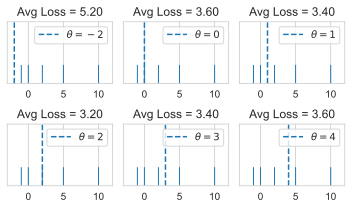

In [4]:
try_thetas(thetas=[-2, 0, 1, 2, 3, 4],
           y_vals=[-1, 0, 2, 5, 10],
           rug_height=0.3,
           xlims=(-3, 12))

We suggest verifying some of these loss values by hand to check that you
understand how the MAE is computed.

Of the values of $\theta$ that we tried, we found that $ \theta = 2 $ has the
lowest mean absolute error. For this simple example, 2 is the median
of the data values. This isn't a coincidence. Let's now check what the average loss
is for the original dataset of bus late times. We find the MAE when
we set $\theta$ to the mode, median, and mean of the arrival times, respectively:

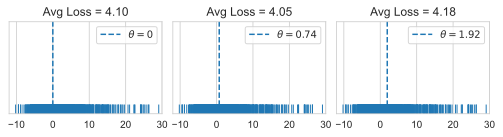

In [6]:
try_thetas(thetas=[0, 0.74, 1.92],
           y_vals=times['minutes_late'],
           xlims=(-12, 30), figsize=(7, 2))

We see again that the median (middle plot) gives a smaller loss than the mode
and mean (left and right plots). In fact, for absolute loss, the minimizing
$\hat{\theta}$ is the $\text{median} \{ y_1, y_2, \ldots, y_n \}$.

So far, we have found the best value of $ \theta $ by simply trying out a few 
values and then picking the one with the smallest loss. To get a better
sense of the MAE as a function of $\theta$, we can try many more values of
$\theta$ and plot a curve that shows how $L(\theta, {\mathbf{y}})$ changes
as $\theta$ changes. We draw the curve for the preceding example with the five
data values, $[–1, 0, 2, 5, 10]$:

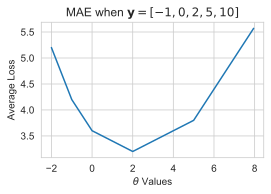

In [5]:
thetas = np.arange(-2, 8, 0.05)
y_vals=np.array([-1, 0, 2, 5, 10])
losses = [mae_loss(theta, y_vals) for theta in thetas]

plt.figure(figsize=(4, 2.5))
plt.plot(thetas, losses)
plt.title(r'MAE when $\bf{y}$$ = [-1, 0, 2, 5, 10] $')
plt.xlabel(r'$ \theta $ Values')
plt.ylabel('Average Loss');

The preceding plot shows that in fact, $ \theta = 2$ is the best choice for this
small dataset of five values.  Notice the shape of the curve. It is piecewise
linear, where the line segments connect at the location of the data values (–1,
0, 2, and 5). This is a property of the absolute value function. With a lot of
data, the flat pieces are less obvious. Our bus data have over 1,400 points and 
the MAE curve appears smoother:

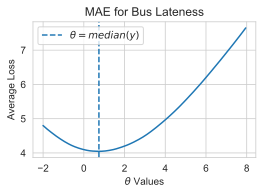

In [6]:
thetas = np.arange(-2, 8, 0.05)
y_vals=times['minutes_late']
losses = [mae_loss(theta, y_vals) for theta in thetas]

plt.figure(figsize=(4, 2.5))
plt.plot(thetas, losses)
plt.axvline(np.median(y_vals), linestyle='--',
                    label=rf'$\theta = median(y)$')
plt.title(r'MAE for Bus Lateness')
plt.xlabel(r'$ \theta $ Values')
plt.ylabel('Average Loss')
plt.legend();

We can use this plot to help confirm that the median of the data is the
minimizing value; in other words, $\hat \theta = 0.74$. This plot is not really a proof, but hopefully it's convincing enough for you. 

Next, let's look at another loss function that squares error.

## Mean Squared Error

We have fitted a constant model to our data and found that with mean absolute error, the minimizer is the median. Now we'll keep our model the same but switch to a different loss function: squared error. Instead of taking the absolute difference between each data value $y$ and the constant $\theta$, we'll square the error. That is, for some value of $\theta$ and data value $y$:

1. Find the error, $y - \theta$.
1. Take the square of the error, $(y - \theta)^2$. 

This gives the loss function ${\cal l}(\theta, y) = (y - \theta)^2$.


As before, we want to use all of our data to find the best $\theta$, so we compute the mean squared error, or MSE for short:

$$
L(\theta, {\mathbf y}) = L(\theta, y_1, y_2, \ldots, y_n)
= \frac{1}{n} \sum_{i = 1}^{n} (y_i - \theta)^2
$$

We can write a simple Python function to compute the MSE:

In [7]:
def mse_loss(theta, y_vals):
    return np.mean((y_vals - theta) ** 2)

Let's again try the mean, median, and mode as potential minimizers of the MSE:

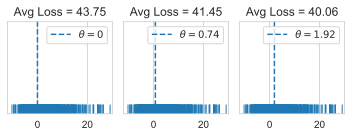

In [8]:
try_thetas(thetas=[0, 0.74, 1.92],
           y_vals=times['minutes_late'],
           xlims=(-12, 30), loss_fn=mse_loss, figsize=(5, 2))

Now when we fit the constant model using MSE loss, we find that the mean
(right plot) has a smaller loss than the mode and the median (left and middle
plots).

Let's plot the MSE curve for different values of $\theta$ given our data.
The curve shows that the minimizing value $ \hat{\theta} $ is close to 2:

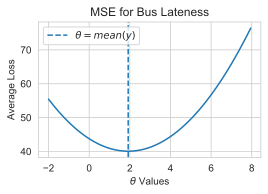

In [9]:
thetas = np.arange(-2, 8, 0.05)
y_vals=times['minutes_late']
losses = [mse_loss(theta, y_vals) for theta in thetas]

plt.figure(figsize=(4, 2.5))
plt.plot(thetas, losses)
plt.axvline(np.mean(y_vals), linestyle='--',
                    label=rf'$\theta = mean(y)$')
plt.title(r'MSE for Bus Lateness')
plt.xlabel(r'$ \theta $ Values')
plt.ylabel('Average Loss')
plt.legend();

One feature of this curve that is quite noticeable is how rapidly the MSE grows compared to  the MAE (note the range on the vertical axis). This growth has to do with the nature of squaring errors; it places a much higher loss on data values further away from $\theta$. If $\theta = 10$ and $y = 110$, the squared loss is $(10 - 110)^2 = 10,000$ whereas the absolute loss is $|10 - 110| = 100$. For this reason, the MSE is more sensitive to unusually large data values than the MAE.

From the MSE curve, it appears that the minimizing $\hat{\theta}$ is the mean of $\mathbf{y}$. 
Again, this is no mere coincidence; the mean of the data always coincides with $ \hat{\theta} $ for squared error. 
We show how this comes about from the quadratic nature of the MSE. Along the way, we demonstrate a common representation of squared loss as a sum of variance and bias terms, which is at the heart of model fitting with squared loss. To begin, we add and subtract $\bar{y}$ in the loss function and expand the square as follows:

$$
\begin{aligned}
L(\theta, \mathbf{y})
&= \frac{1}{n} \sum_{i = 1}^{n}(y_i - \theta)^2\\
&= \frac{1}{n} \sum_{i = 1}^{n} [(y_i -  \bar{y}) + (\bar{y} - \theta)]^2 \\
&= \frac{1}{n} \sum_{i = 1}^{n} [(y_i -  \bar{y})^2 + 2(y_i - \bar{y})(\bar{y} - \theta) +(\bar{y} - \theta)^2]\\
\end{aligned}
$$


Next, we split the MSE into the sum of these three terms and note that the middle term is 0, due to the simple property of the average: $\sum (y_i - \bar{y}) = 0$. 

$$
\begin{aligned}
 \frac{1}{n} \sum_{i = 1}^{n}& (y_i - \bar{y})^2 + \frac{1}{n} \sum_{i = 1}^{n}2(y_i - \bar{y})(\bar{y} - \theta) + \frac{1}{n}\sum_{i = 1}^{n}(\bar{y} - \theta)^2 \\
 &= \frac{1}{n} \sum_{i = 1}^{n} (y_i - \bar{y})^2 + 2(\bar{y} - \theta)\frac{1}{n} \sum_{i = 1}^{n}(y_i - \bar{y}) + \frac{1}{n}\sum_{i = 1}^{n}(\bar{y} - \theta)^2 \\
&= \frac{1}{n} \sum_{i = 1}^{n}  (y_i -  \bar{y})^2 + (\bar{y} - \theta)^2 \\
\end{aligned}
$$


Of the remaining two terms, the first does not involve $\theta$. You probably recognize it as the variance of the data.  The second term is always non-negative. It is called the *bias squared*. This second term, the bias squared, is 0 when $\theta$ is ${\bar y}$, so ${\hat \theta}= {\bar y}$ gives the smallest MSE for any dataset. 

We have seen that for absolute loss, the best constant model is the median, but for squared error, it's the mean. The choice of the loss function is an important aspect of model fitting.

## Choosing Loss Functions

Now that we've worked with two loss functions, we can return to our original
question: how do we choose whether to use the median, mean, or mode? 
Since these statistics minimize different loss functions,[^mode]
we can equivalently ask: what is the most appropriate loss function for our
problem? To answer this question, we look at the context of our problem.

[^mode]: The mode minimizes a loss function called 0-1 loss. Although we
    haven't covered this specific loss, the procedure is identical: pick
    the loss function, then find $\hat{\theta}$ what minimizes the loss.


Compared to the MAE, the MSE gives especially large losses when the bus is
much later (or earlier) than expected. A bus rider who wants to understand the typical late times would use the MAE and the median (0.74 minutes late), but a rider who despises unexpected
large late times might summarize the data using the MSE and the mean (1.92 minutes late).

If we want to refine the model even more, we can use a more specialized loss function. For example, suppose that when a bus arrives early, it waits at the stop until the scheduled time of departure; then we might want to assign an early arrival 0 loss. And if a really late bus is a larger aggravation than a moderately late one, we might choose an *asymmetric loss function* that gives a larger penalty to super-late arrivals. 

In essence, context matters when choosing a
loss function. By thinking carefully about how we plan to use the model, we can pick a loss function that helps us make good data-drive decisions.